IF error : Intel MKL FATAL ERROR: Cannot load libmkl_avx2.so or libmkl_def.so.
        
conda install nomkl numpy scipy scikit-learn numexpr

conda remove mkl mkl-service

https://github.com/jakevdp/sklearn_tutorial/blob/master/notebooks/02.2-Basic-Principles.ipynb

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import linear_model

In [3]:
from __future__ import print_function
import IPython
print('IPython:', IPython.__version__)
import numpy
print('numpy:', numpy.__version__)
import scipy
print('scipy:', scipy.__version__)
import matplotlib
print('matplotlib:', matplotlib.__version__)
import sklearn
print('scikit-learn:', sklearn.__version__)
import seaborn
print('seaborn', seaborn.__version__)

IPython: 4.2.0
numpy: 1.11.1
scipy: 0.17.1
matplotlib: 1.5.1
scikit-learn: 0.17.1
seaborn 0.7.0


In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
model = LinearRegression(normalize=True)
print(model.normalize)

True


In [6]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


In [7]:
x = np.arange(10)
y = 2 * x + 1

In [8]:
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 1  3  5  7  9 11 13 15 17 19]


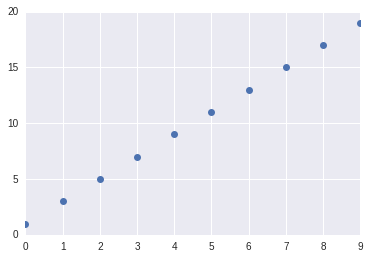

In [9]:
plt.plot(x, y, 'o');

In [10]:
# The input data for sklearn is 2D: (samples == 10 x features == 1)
X = x[:, np.newaxis]
print(X)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 1  3  5  7  9 11 13 15 17 19]


In [11]:
# fit the model on our data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [12]:
# underscore at the end indicates a fit parameter
print(model.coef_)
print(model.intercept_)

[ 2.]
1.0


In [13]:
# residual error around fit
model.residues_

/home/octo/anaconda2/envs/PyAlgo/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


3.2540512340366737e-30

In [14]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
path = '/home/octo/Desktop/QTPY/data/min/'
#path = '/home/octo/Desktop/QTPY/data/sec/'

In [18]:
data1='QQQ.csv'
data2='SPY.csv'

In [19]:
data3=pd.read_csv(path + 'SPY.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)

In [20]:
data3.tail()

,high,low,open,close,total_volume,volume
2016-06-30 15:57:00,209.13,209.05,209.110,209.095,127751609,801173
2016-06-30 15:58:00,209.13,209.08,209.090,209.090,128520349,652274
2016-06-30 15:59:00,209.22,209.07,209.080,209.195,131728572,2180889
2016-06-30 16:00:00,209.54,209.16,209.195,209.500,137953765,4926630
2016-06-30 16:01:00,209.53,209.13,209.500,209.160,144713138,6723330


In [21]:
#open() forms list format that can not be converted to HDFSstore
h5s = pd.HDFStore(path + 'SPY.h5s', 'w')

In [22]:
h5s['SPY'] =data3

In [23]:
h5s.close()

In [24]:
h5s

<class 'pandas.io.pytables.HDFStore'>
File path: /home/octo/Desktop/QTPY/data/min/SPY.h5s
File is CLOSED

In [25]:
h5s = pd.HDFStore(path + 'SPY.h5s', 'r')
data4 = h5s['SPY']
h5s.close()

In [27]:
len(data4)

245538

In [28]:
data4['close'].head()

2014-01-02 09:31:00    183.890
2014-01-02 09:32:00    183.895
2014-01-02 09:33:00    183.960
2014-01-02 09:34:00    183.970
2014-01-02 09:35:00    183.880
Name: close, dtype: float64

In [29]:
lags = 5
m = np.zeros((lags + 1, len(data4['close']) - lags))

In [30]:
# generating regression vectors
for i in xrange(lags + 1):
    if i == lags:
        m[i] = data4['close'].values[i:].T
    else:
        m[i] = data4['close'].values[i: i - lags].T

In [31]:
np.shape(m)

(6, 245533)

In [32]:
x = m[:lags].T
y = m[-1]

In [33]:
np.shape(x)

(245533, 5)

In [34]:
np.shape(y)

(245533,)

In [35]:
split = 5000

In [36]:
xtr, xte, ytr, yte = x[:split], x[split:], y[:split], y[split:]

In [37]:
np.shape(xtr)

(5000, 5)

In [38]:
np.shape(ytr)

(5000,)

In [39]:
np.shape(xte)

(240533, 5)

In [40]:
np.shape(yte)

(240533,)

Regression Step

In [41]:
lm = linear_model.LinearRegression()

In [42]:
lm.fit(xtr, ytr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
lm.coef_

array([-0.00324348,  0.00969429, -0.00607119,  0.00964863,  0.98691552])

In [44]:
lm.intercept_

0.56091034906603454

Test Data Set

In [45]:
pred = lm.predict(xte)

In [46]:
plen = len(pred)

In [47]:
res = data[-plen:].copy()
res['pred'] = pred

In [48]:
res.tail()

,high,low,open,close,total_volume,volume,pred
2016-06-30 15:57:00,209.13,209.05,209.110,209.095,127751609,801173,209.022073
2016-06-30 15:58:00,209.13,209.08,209.090,209.090,128520349,652274,209.016220
2016-06-30 15:59:00,209.22,209.07,209.080,209.195,131728572,2180889,209.012550
2016-06-30 16:00:00,209.54,209.16,209.195,209.500,137953765,4926630,209.115446
2016-06-30 16:01:00,209.53,209.13,209.500,209.160,144713138,6723330,209.417547


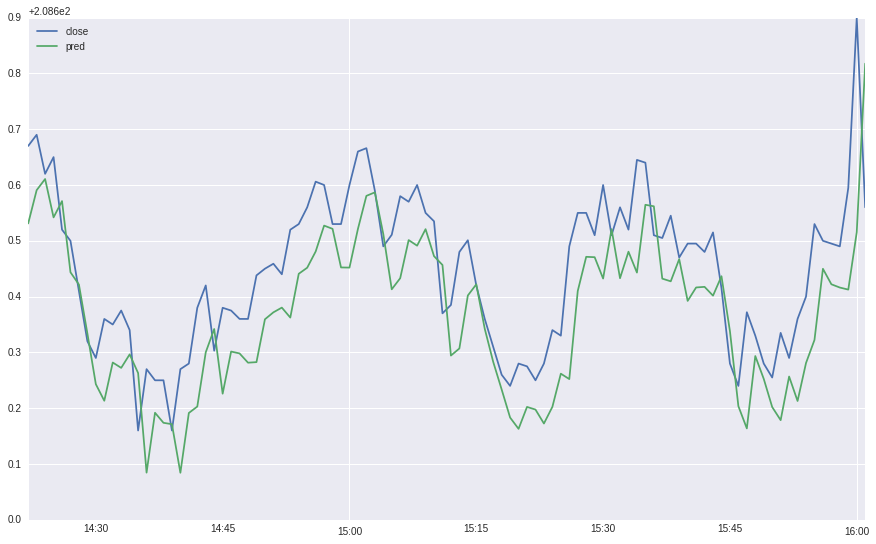

In [55]:
#res[['high','low','open','close','pred']].tail(100).plot(figsize=(15, 9));
res[['close','pred']].tail(100).plot(figsize=(15, 9));

In [58]:
res['diff'] = res['pred'] - res['close']

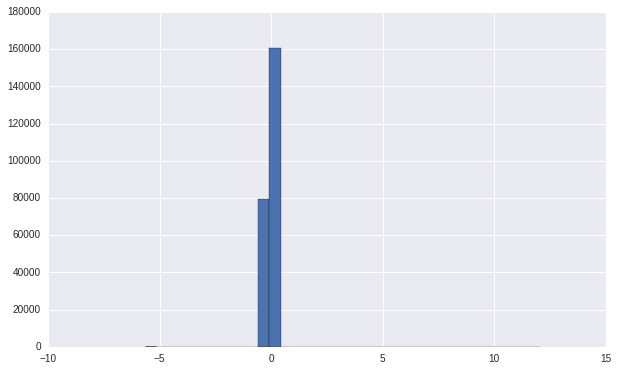

In [59]:
res['diff'].hist(bins=35, figsize=(10, 6));

In [61]:
res['diff'].describe()

count    240533.000000
mean         -0.051545
std           0.095948
min          -5.629566
25%          -0.092865
50%          -0.054567
75%          -0.013481
max          12.028727
Name: diff, dtype: float64

Complete Data Set

In [62]:
pred = np.concatenate((lm.predict(xtr), lm.predict(xte)))
plen = len(pred)

In [63]:
res = data[-plen:].copy()
res['pred'] = pred

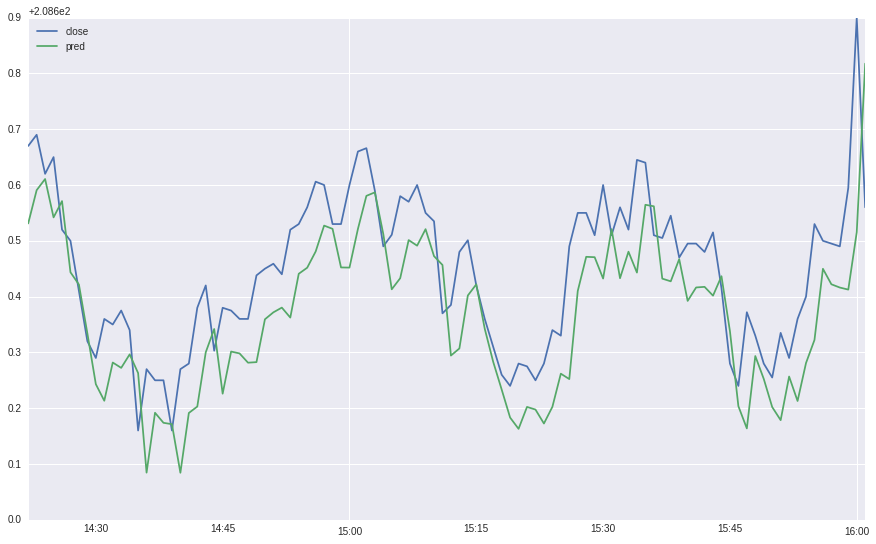

In [65]:
#res.plot(figsize=(10, 6));
res[['close','pred']].tail(100).plot(figsize=(15, 9));

In [66]:
res['diff'] = res['pred'] - res['close']

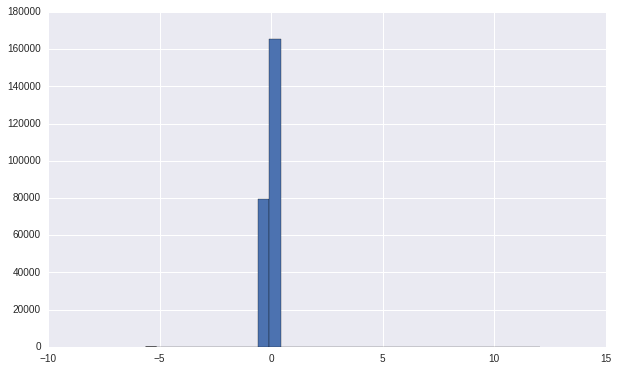

In [67]:
res['diff'].hist(bins=35, figsize=(10, 6));

In [68]:
res['diff'].describe()

count    245533.000000
mean         -0.050496
std           0.095516
min          -5.629566
25%          -0.092001
50%          -0.053241
75%          -0.011862
max          12.028727
Name: diff, dtype: float64

Ridge Regression

In [69]:
lm = linear_model.Ridge(alpha=0.5)

In [70]:
lm.fit(xtr, ytr)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [71]:
pred = lm.predict(xte)
plen = len(pred)

In [72]:
lm.coef_

array([-0.00257577,  0.00860646, -0.00347142,  0.04305958,  0.95121059])

In [73]:
lm.intercept_

0.58189153615205669

In [74]:
res = data[-plen:].copy()
res['pred'] = pred

In [75]:
res.tail()

,high,low,open,close,total_volume,volume,pred
2016-06-30 15:57:00,209.13,209.05,209.110,209.095,127751609,801173,209.019903
2016-06-30 15:58:00,209.13,209.08,209.090,209.090,128520349,652274,209.013568
2016-06-30 15:59:00,209.22,209.07,209.080,209.195,131728572,2180889,209.009717
2016-06-30 16:00:00,209.54,209.16,209.195,209.500,137953765,4926630,209.108803
2016-06-30 16:01:00,209.53,209.13,209.500,209.160,144713138,6723330,209.403495


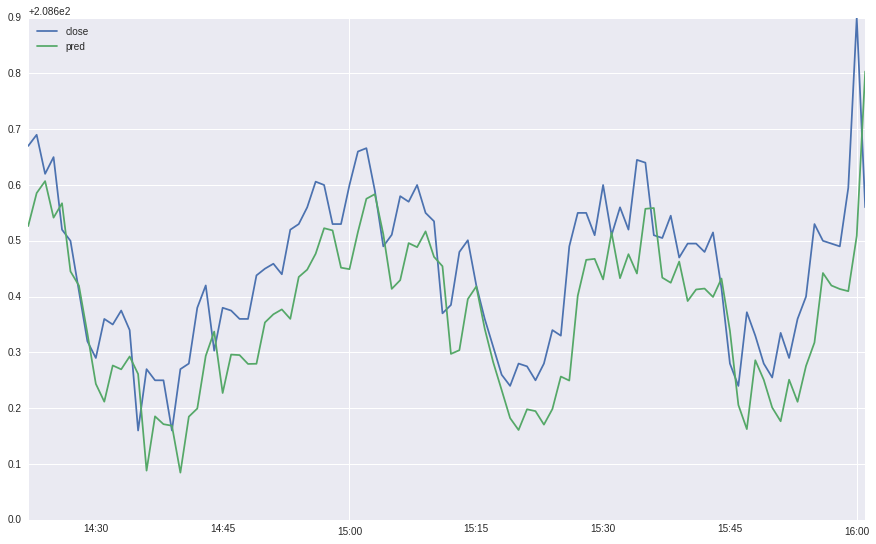

In [76]:
#res.plot(figsize=(10, 6));
res[['close','pred']].tail(100).plot(figsize=(15, 9));

In [77]:
res['diff'] = res['pred'] - res['close']

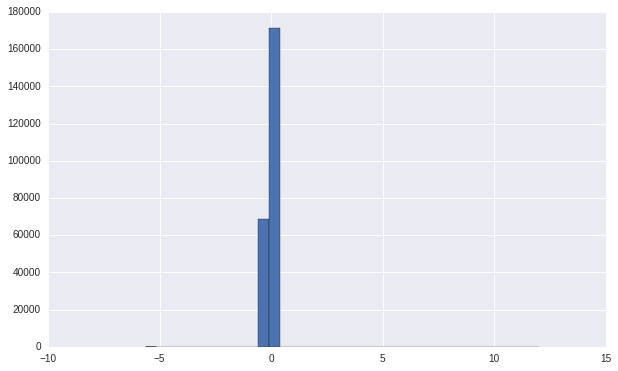

In [78]:
res['diff'].hist(bins=35, figsize=(10, 6));

In [79]:
res['diff'].describe()

count    240533.000000
mean         -0.053474
std           0.096301
min          -5.632795
25%          -0.095324
50%          -0.056650
75%          -0.014983
max          12.005848
Name: diff, dtype: float64

Bayesian Ridge Regression

In [80]:
lm = linear_model.BayesianRidge()

In [81]:
lm.fit(xtr, ytr)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [82]:
pred = lm.predict(xte)

In [83]:
lm.coef_

array([-0.00322389,  0.00965978, -0.00602923,  0.01062061,  0.98591339])

In [84]:
lm.intercept_

0.56147829031277752

In [85]:
res = data[-plen:].copy()
res['pred'] = pred

In [86]:
res.tail()

,high,low,open,close,total_volume,volume,pred
2016-06-30 15:57:00,209.13,209.05,209.110,209.095,127751609,801173,209.022019
2016-06-30 15:58:00,209.13,209.08,209.090,209.090,128520349,652274,209.016148
2016-06-30 15:59:00,209.22,209.07,209.080,209.195,131728572,2180889,209.012473
2016-06-30 16:00:00,209.54,209.16,209.195,209.500,137953765,4926630,209.115262
2016-06-30 16:01:00,209.53,209.13,209.500,209.160,144713138,6723330,209.417159


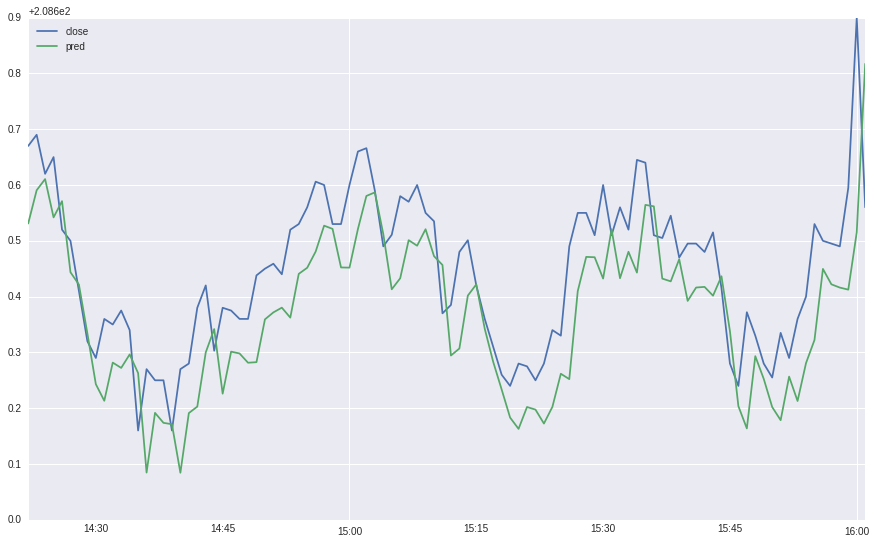

In [87]:
#res.plot(figsize=(10, 6));
res[['close','pred']].tail(100).plot(figsize=(15, 9));

In [88]:
res['diff'] = res['pred'] - res['close']

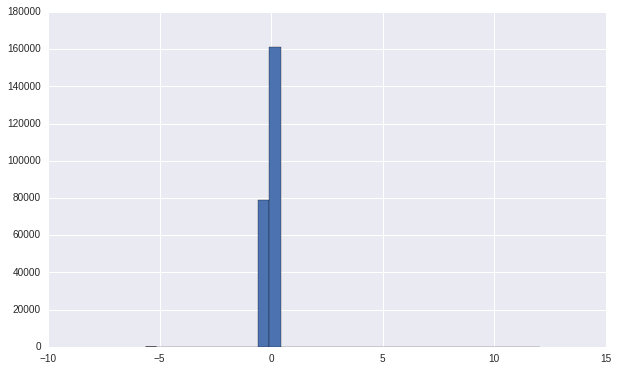

In [89]:
res['diff'].hist(bins=35, figsize=(10, 6));

In [90]:
res['diff'].describe()

count    240533.000000
mean         -0.051598
std           0.095956
min          -5.629680
25%          -0.092917
50%          -0.054617
75%          -0.013534
max          12.028080
Name: diff, dtype: float64

## Classification with Logistic Regression

Logistic regression is a linear model for classification rather than regression. Cf., for example, [this notebook](http://nbviewer.jupyter.org/github/justmarkham/DAT8/blob/master/notebooks/12_logistic_regression.ipynb) for a discussion and illustration. The notebook is part of a larger set of resources found on [this tutorial page](http://www.dataschool.io/guide-to-logistic-regression/).

In [91]:
lm = linear_model.LogisticRegression(C=1e4)

In [92]:
rets = np.log(data['open'] / data['open'].shift(1)).dropna()

In [93]:
lags = 5
m = np.zeros((lags + 1, len(rets) - lags))

In [94]:
# generating regression vectors
for i in xrange(lags + 1):
    if i == lags:
        m[i] = rets.values[i:].T
    else:
        m[i] = rets.values[i: i - lags].T

In [170]:
np.shape(m)

(6, 245532)

In [96]:
x = m[:lags].T
y = m[-1]

In [97]:
split = 375

In [98]:
xtr, xte, ytr, yte = x[:split], x[split:], np.sign(y[:split]), np.sign(y[split:])

In [99]:
xtr[:6]

array([[ -4.89303296e-04,   5.43803213e-07,   3.80046116e-04,
          5.43581660e-05,  -4.34948085e-04],
       [  5.43803213e-07,   3.80046116e-04,   5.43581660e-05,
         -4.34948085e-04,  -4.35137347e-04],
       [  3.80046116e-04,   5.43581660e-05,  -4.34948085e-04,
         -4.35137347e-04,  -7.89169372e-04],
       [  5.43581660e-05,  -4.34948085e-04,  -4.35137347e-04,
         -7.89169372e-04,   3.07033687e-04],
       [ -4.34948085e-04,  -4.35137347e-04,  -7.89169372e-04,
          3.07033687e-04,  -7.69939929e-04],
       [ -4.35137347e-04,  -7.89169372e-04,   3.07033687e-04,
         -7.69939929e-04,  -4.90369694e-04]])

In [171]:
ytr[:6]

array([-1.,  1., -1., -1., -1., -1.])

In [172]:
lm.fit(xtr, ytr)

LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [102]:
pred = lm.predict(xtr)

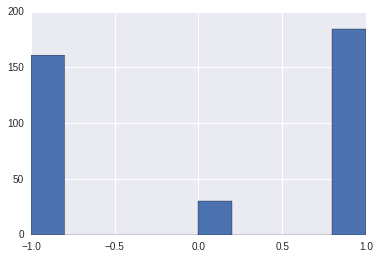

In [103]:
# performance on training data
plt.hist(ytr * pred);

In [104]:
pd.Series(ytr * pred).value_counts()

 1    184
-1    161
 0     30
dtype: int64

In [105]:
pred = lm.predict(xte)

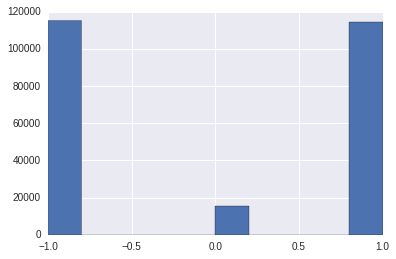

In [106]:
# performance on test data
plt.hist(yte * pred);

In [107]:
pd.Series(yte * pred).value_counts()

-1    115160
 1    114449
-0     15548
dtype: int64

Classification with Support Vector Machines

In [109]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')

In [2]:
rets = np.log(data4['close'] / data4['close'].shift(1)).dropna()

NameError: name 'np' is not defined

In [112]:
lags = 5
m = np.zeros((lags + 1, len(rets) - lags))

In [113]:
# generating regression vectors
for i in xrange(lags + 1):
    if i == lags:
        m[i] = rets.values[i:].T
    else:
        m[i] = rets.values[i: i - lags].T

In [114]:
np.shape(m)

(6, 245532)

In [115]:
x = m[:lags].T
y = m[-1]

In [173]:
y

array([-0.00081635,  0.00032662, -0.00087122, ...,  0.00050205,
        0.00145691, -0.00162423])

In [116]:
split = 375

In [117]:
xtr, xte, ytr, yte = x[:split], x[split:], np.sign(y[:split]), np.sign(y[split:])

In [1]:
xtr[:6]

NameError: name 'xtr' is not defined

In [174]:
ytr[:6]

array([-1.,  1., -1., -1., -1., -1.])

In [120]:
svm.fit(xtr, ytr)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [121]:
pred = lm.predict(xtr)

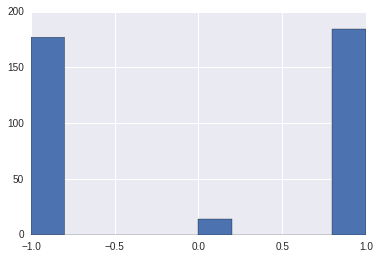

In [122]:
# performance on training data
plt.hist(ytr * pred);

In [123]:
pd.Series(ytr * pred).value_counts()

 1    184
-1    177
-0     14
dtype: int64

In [124]:
pred = lm.predict(xte)

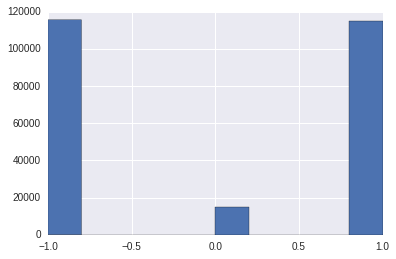

In [125]:
# performance on test data
plt.hist(yte * pred);

In [126]:
sr = pd.Series(yte * pred).value_counts()
sr

-1    115577
 1    114893
-0     14687
dtype: int64

In [127]:
sr.apply(lambda x: float(x) / np.sum(sr))

-1    0.471441
 1    0.468651
-0    0.059909
dtype: float64

Classification with K-Means Clustering

In [145]:
from sklearn.cluster import KMeans
est = KMeans(2)  # 2 clusters

In [146]:
est.fit(xtr)  # model fit

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [147]:
pred = np.where(est.predict(xtr) == 0, -1, 1)

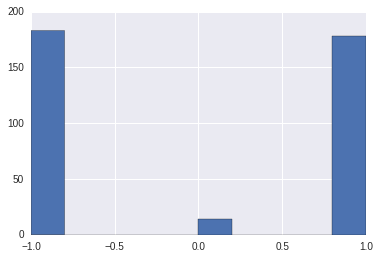

In [148]:
# performance on training data
plt.hist(ytr * pred);

In [149]:
pd.Series(ytr * pred).value_counts()

-1    183
 1    178
 0     14
dtype: int64

In [143]:
pred = np.where(est.predict(xte) == 0, -1, 1)

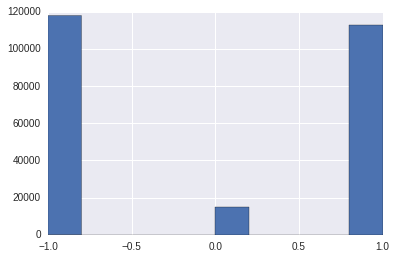

In [144]:
# performance on test data
plt.hist(yte * pred);

In [136]:
sr = pd.Series(yte * pred).value_counts()
sr

 1    115690
-1    114780
-0     14687
dtype: int64

In [137]:
sr.apply(lambda x: float(x) / np.sum(sr))

 1    0.471902
-1    0.468190
-0    0.059909
dtype: float64

RANDOM FOREST

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
est= RandomForestClassifier()

In [155]:
est.fit(xtr,ytr)  # model fit

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [158]:
predicted= est.predict(xte)

In [161]:
pred = np.where(est.predict(xtr) == 0, -1, 1)

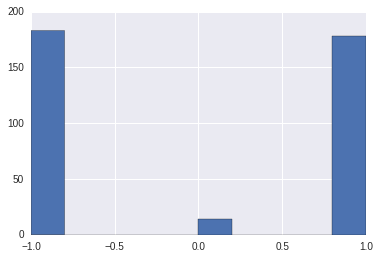

In [162]:
# performance on training data
plt.hist(ytr * pred);

In [163]:
pd.Series(ytr * pred).value_counts()

-1    183
 1    178
-0     14
dtype: int64

In [164]:
pred = np.where(est.predict(xte) == 0, -1, 1)

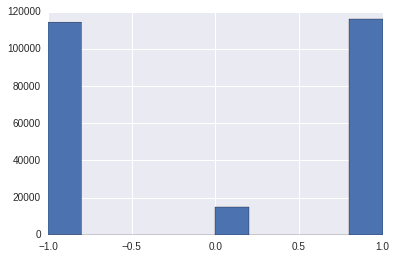

In [165]:
# performance on training data
plt.hist(yte * pred);

In [168]:
sr = pd.Series(yte * pred).value_counts()
sr

 1    116127
-1    114343
 0     14687
dtype: int64

In [169]:
sr.apply(lambda x: float(x) / np.sum(sr))

 1    0.473684
-1    0.466407
 0    0.059909
dtype: float64